# Web Scraping and Data Analytics Project: E-Commerce Book Data
## **Objective:**
Scrape book data from a public website, clean and analyze the data, visualize insights, and create a custom dataset.

## **Step 1: Import Libraries**

In [ ]:

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# For better visualization
plt.style.use('ggplot')


## **Step 2: Web Scraping**
We'll scrape book details (Title, Price, Rating) from `https://books.toscrape.com/`.

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

base_url = "https://books.toscrape.com/catalogue/page-{}.html"
books = []

for page in range(1, 4):  # scrape first 3 pages for demo
    url = base_url.format(page)
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    for book in soup.find_all("article", class_="product_pod"):
        title = book.h3.a["title"]
        price = book.find("p", class_="price_color").text.replace("£", "")
        rating = book.p["class"][1]

        books.append([title, float(price), rating])

# Create DataFrame
df = pd.DataFrame(books, columns=["Title", "Price", "Rating"])
df.head()

,Title,Price,Rating
0,A Light in the Attic,51.77,Three
1,Tipping the Velvet,53.74,One
2,Soumission,50.10,One
3,Sharp Objects,47.82,Four
4,Sapiens: A Brief History of Humankind,54.23,Five


## **Step 3: Data Cleaning**
Convert rating text to numeric values.

In [4]:

rating_map = {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5}
df["Rating"] = df["Rating"].map(rating_map)
df.head()


,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5


## **Step 4: Basic Analysis**
Compute basic statistics.

In [5]:

print("Average Price:", df["Price"].mean())
print("Average Rating:", df["Rating"].mean())
df.describe()


Average Price: 35.00266666666667
Average Rating: 3.0


,Price,Rating
count,60.000000,60.000000
mean,35.002667,3.000000
std,14.553082,1.507046
min,12.840000,1.000000
25%,22.040000,1.750000
50%,33.485000,3.000000
75%,50.142500,4.000000
max,57.310000,5.000000


## **Step 5: Visualizations**
### Price Distribution

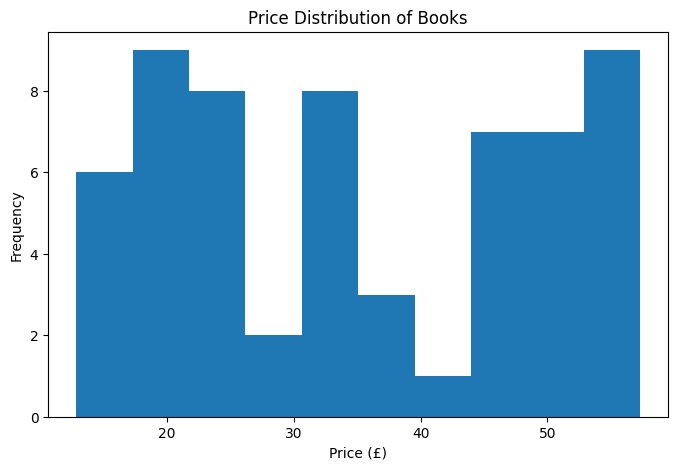

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["Price"], bins=10)
plt.title("Price Distribution of Books")
plt.xlabel("Price (£)")
plt.ylabel("Frequency")
plt.show()

### Ratings Distribution

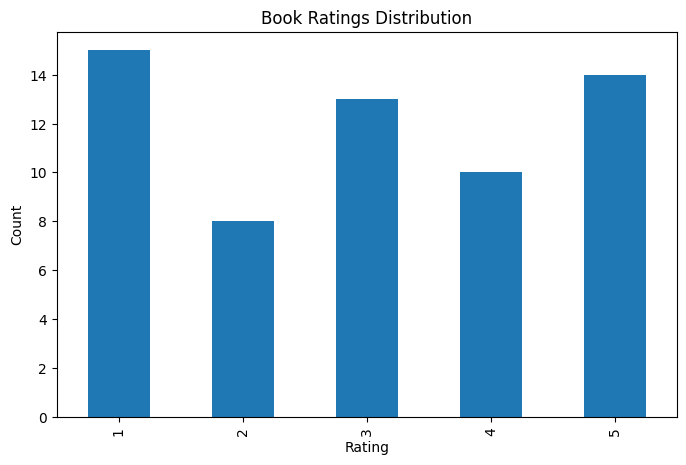

In [8]:

plt.figure(figsize=(8,5))
df["Rating"].value_counts().sort_index().plot(kind="bar")
plt.title("Book Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


## **Step 6: Save Custom Dataset**

In [9]:

df.to_csv("books_dataset.csv", index=False)
print("Dataset saved as books_dataset.csv")


Dataset saved as books_dataset.csv
